# Airline Delay Analysis

#### This coursework uses the U.S. Department of Transportation’s Airline On-Time Statistics and Delay Causes dataset, which provides monthly records on domestic flights operated by major U.S. carriers. The dataset includes counts of on-time, delayed, canceled, and diverted flights, along with detailed delay-cause categories such as Air Carrier, Extreme Weather, NAS (National Aviation System), Late-Arriving Aircraft, and Security.

#### Using this dataset of over 400,000 flight records (2003-2025), the coursework develops a full machine learning pipeline for analyzing and predicting airline delays. The goal is to perform exploratory data analysis, engineer meaningful features, train regression and classification models, and deploy an interactive Streamlit application for real-time delay predictions. The project also aims to extract business insights that airlines and airports can use to improve operational efficiency and reduce delays.

## Student ID: 00016395



______________________________________________________________________________________________________________________________________________________________

# Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries loaded successfully!")


All libraries loaded successfully!


# Loading the dataset, identify shape and overview

In [6]:
df = pd.read_csv('data/Airline_Delay_Cause.csv')
print("Dataset loaded sucessfully!!!")
print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")
print("=" * 40)
print("Dataset First 10 rows: ")
df.head(10)

Dataset loaded sucessfully!!!
Dataset shape: 409612 rows x 21 columns
Dataset First 10 rows: 


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,7,YV,Mesa Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",18.0,2.0,1.43,0.00,0.57,0.0,0.00,0.0,0.0,44.0,32.0,0.0,12.0,0.0,0.0
1,2025,7,YV,Mesa Airlines Inc.,CHS,"Charleston, SC: Charleston AFB/International",48.0,16.0,4.06,3.15,5.49,0.0,3.30,2.0,0.0,1282.0,331.0,438.0,259.0,0.0,254.0
2,2025,7,YV,Mesa Airlines Inc.,CLE,"Cleveland, OH: Cleveland-Hopkins International",65.0,10.0,3.53,1.00,3.04,0.0,2.43,2.0,0.0,735.0,151.0,172.0,139.0,0.0,273.0
3,2025,7,YV,Mesa Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",134.0,31.0,13.19,2.43,10.63,0.0,4.74,8.0,0.0,2264.0,798.0,303.0,702.0,0.0,461.0
4,2025,7,YV,Mesa Airlines Inc.,CMH,"Columbus, OH: John Glenn Columbus International",61.0,12.0,6.44,0.28,3.59,0.0,1.69,0.0,0.0,630.0,211.0,17.0,123.0,0.0,279.0
5,2025,7,YV,Mesa Airlines Inc.,COS,"Colorado Springs, CO: City of Colorado Springs...",31.0,5.0,1.84,0.00,1.15,0.0,2.01,0.0,0.0,668.0,154.0,0.0,67.0,0.0,447.0
6,2025,7,YV,Mesa Airlines Inc.,CRP,"Corpus Christi, TX: Corpus Christi International",19.0,4.0,0.71,0.30,0.70,0.0,2.29,1.0,0.0,823.0,45.0,6.0,14.0,0.0,758.0
7,2025,7,YV,Mesa Airlines Inc.,CVG,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",75.0,14.0,7.64,1.00,3.57,0.0,1.79,0.0,0.0,722.0,485.0,24.0,81.0,0.0,132.0
8,2025,7,YV,Mesa Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",97.0,23.0,8.09,0.73,4.85,0.0,9.33,1.0,0.0,2125.0,655.0,65.0,437.0,0.0,968.0
9,2025,7,YV,Mesa Airlines Inc.,DRO,"Durango, CO: Durango La Plata County",31.0,1.0,0.82,0.00,0.18,0.0,0.00,0.0,0.0,50.0,41.0,0.0,9.0,0.0,0.0


## Data Types and stats

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409612 entries, 0 to 409611
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 409612 non-null  int64  
 1   month                409612 non-null  int64  
 2   carrier              409612 non-null  object 
 3   carrier_name         409612 non-null  object 
 4   airport              409612 non-null  object 
 5   airport_name         409612 non-null  object 
 6   arr_flights          408952 non-null  float64
 7   arr_del15            408656 non-null  float64
 8   carrier_ct           408952 non-null  float64
 9   weather_ct           408952 non-null  float64
 10  nas_ct               408952 non-null  float64
 11  security_ct          408952 non-null  float64
 12  late_aircraft_ct     408952 non-null  float64
 13  arr_cancelled        408952 non-null  float64
 14  arr_diverted         408952 non-null  float64
 15  arr_delay        

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,409612.000000,409612.000000,408952.000000,408656.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000
mean,2014.715218,6.468014,361.155219,69.864434,20.621496,2.536097,22.230743,0.171458,24.254104,6.744285,0.840910,4218.975002,1324.919900,228.574708,1034.045357,7.148976,1624.278981
std,6.616430,3.442544,993.827182,194.585817,48.715269,9.662785,79.393254,0.821340,74.913717,34.782892,3.834991,12976.256753,3905.756663,909.755462,4362.757658,39.156889,5246.925768
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2009.000000,3.000000,55.000000,8.000000,2.790000,0.000000,1.410000,0.000000,1.540000,0.000000,0.000000,408.000000,134.000000,0.000000,49.000000,0.000000,77.000000
50%,2015.000000,6.000000,112.000000,21.000000,7.500000,0.530000,4.910000,0.000000,5.550000,1.000000,0.000000,1150.000000,411.000000,23.000000,184.000000,0.000000,347.000000
75%,2021.000000,9.000000,254.000000,52.000000,18.660000,2.000000,13.980000,0.000000,16.270000,4.000000,1.000000,2999.000000,1082.000000,158.000000,558.000000,0.000000,1104.000000
max,2025.000000,12.000000,21977.000000,6377.000000,1886.580000,717.940000,4091.270000,80.560000,2588.130000,4951.000000,256.000000,648300.000000,321792.000000,64550.000000,238440.000000,3760.000000,279153.000000


# Exploratory Data Analysis

### Checking Missing or NA values

In [8]:
null_values = df.isnull().sum()
print("Missing/NA values: ")
print(null_values)


Missing/NA values: 
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            660
arr_del15              956
carrier_ct             660
weather_ct             660
nas_ct                 660
security_ct            660
late_aircraft_ct       660
arr_cancelled          660
arr_diverted           660
arr_delay              660
carrier_delay          660
weather_delay          660
nas_delay              660
security_delay         660
late_aircraft_delay    660
dtype: int64


### Distribution of arrival delay

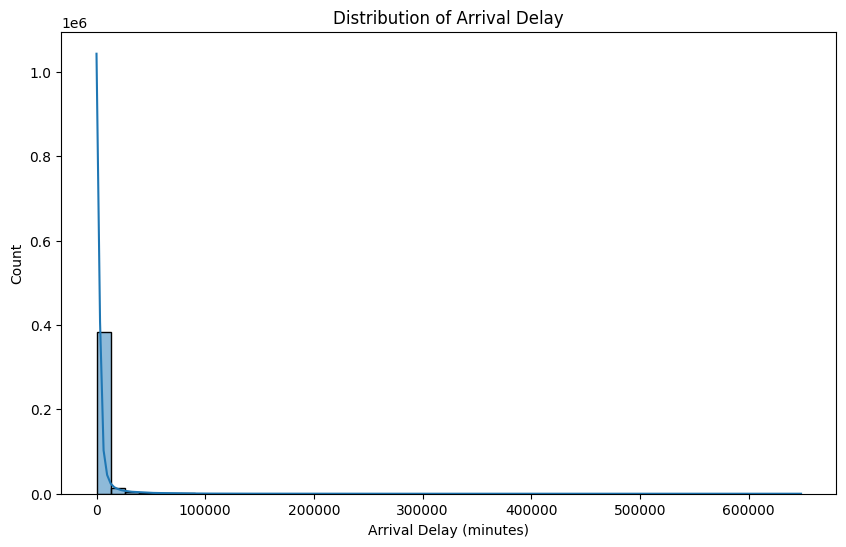

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['arr_delay'], bins=50, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

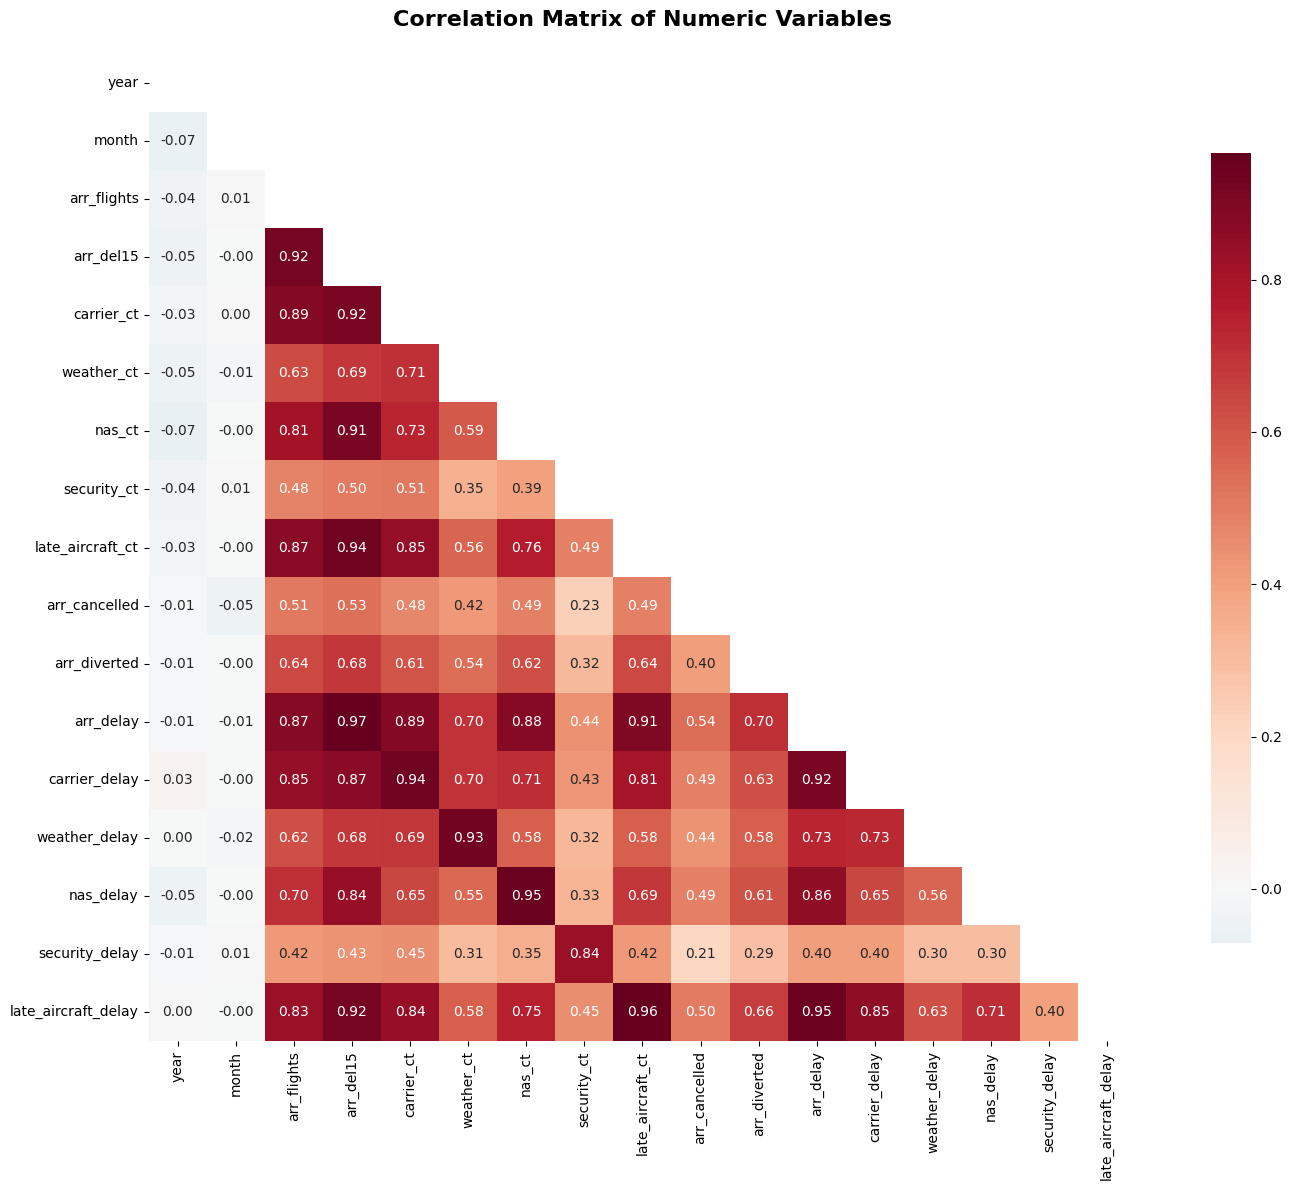

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = df[numeric_cols]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Removing missing values from dataset

In [11]:
df_clean = df.dropna()
df_clean.isnull().sum()


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

## Comprehensive data analysis with cleaned data

For further usage following two indicators should be created:

In [12]:
df['delay_rate'] = (df['arr_del15'] / df['arr_flights']) * 100  
df['has_delays'] = (df['arr_del15'] > 0).astype(int)

print(f"Indicators created:")
print(f"delay_rate: Percentage of flights delayed 15+ minutes")
print(f"has_delays: Binary indicator (0=no delays, 1=some delays)")

Indicators created:
delay_rate: Percentage of flights delayed 15+ minutes
has_delays: Binary indicator (0=no delays, 1=some delays)


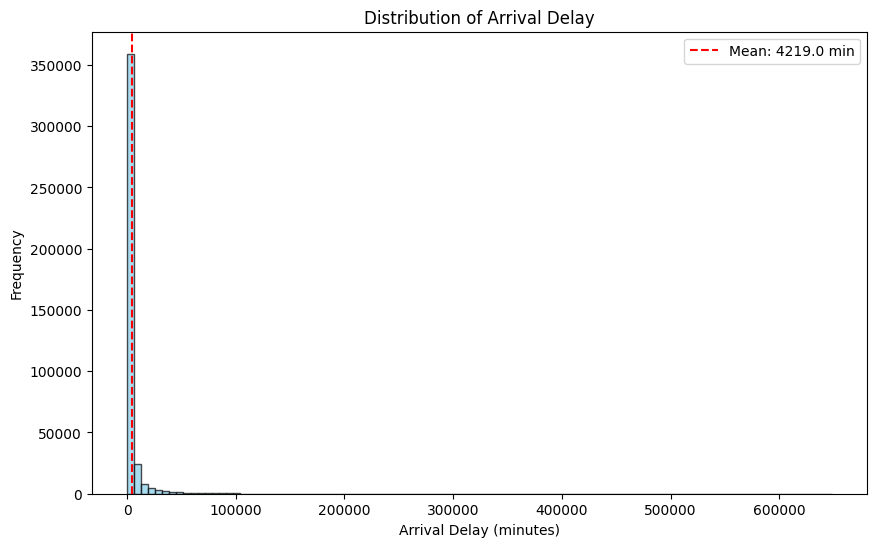

In [13]:
arr_delay = df['arr_delay']
mean_arr_delay = arr_delay.mean()

plt.figure(figsize=(10, 6))
plt.hist(arr_delay, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_arr_delay, color='red', linestyle='--', 
            label=f'Mean: {mean_arr_delay:.1f} min')
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

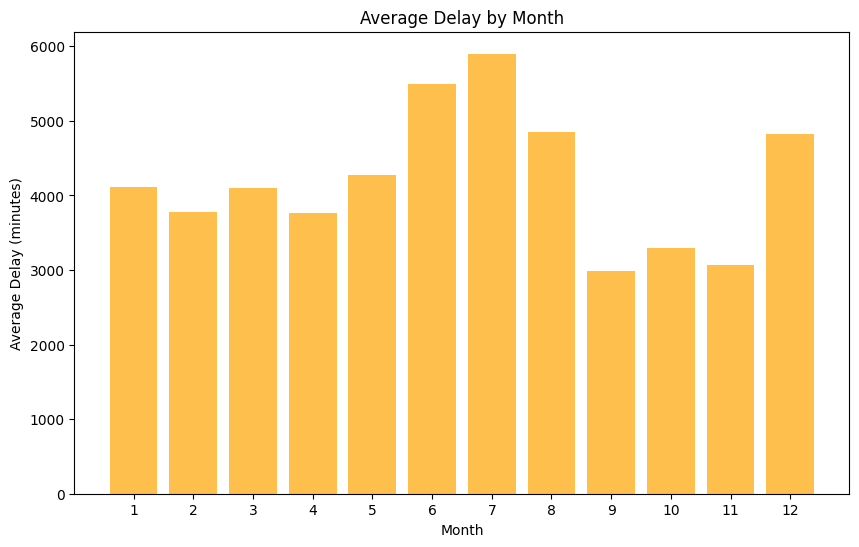

In [14]:
monthly_delay = df.groupby('month')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_delay.index, monthly_delay.values, color='orange', alpha=0.7)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13))
plt.show()

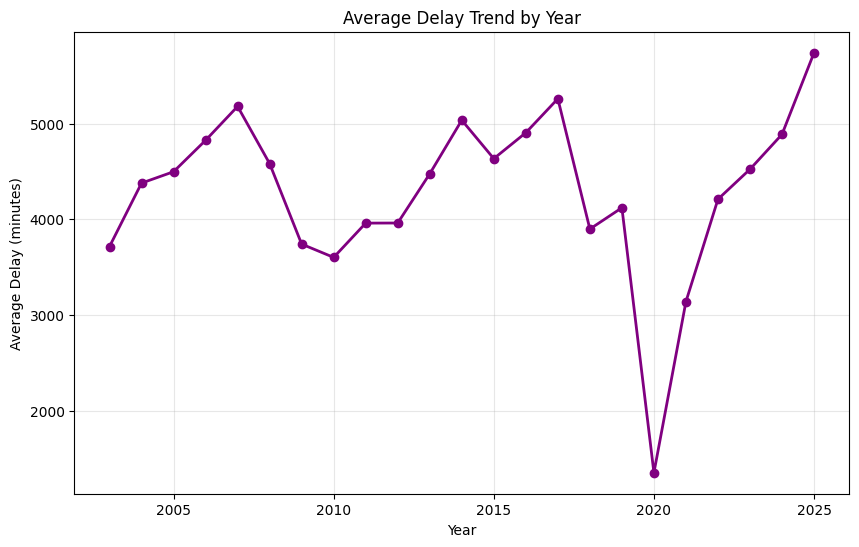

In [15]:
yearly_delay = df.groupby('year')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_delay.index, yearly_delay.values, marker='o',
         linewidth=2, color='purple')
plt.title('Average Delay Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)
plt.show()


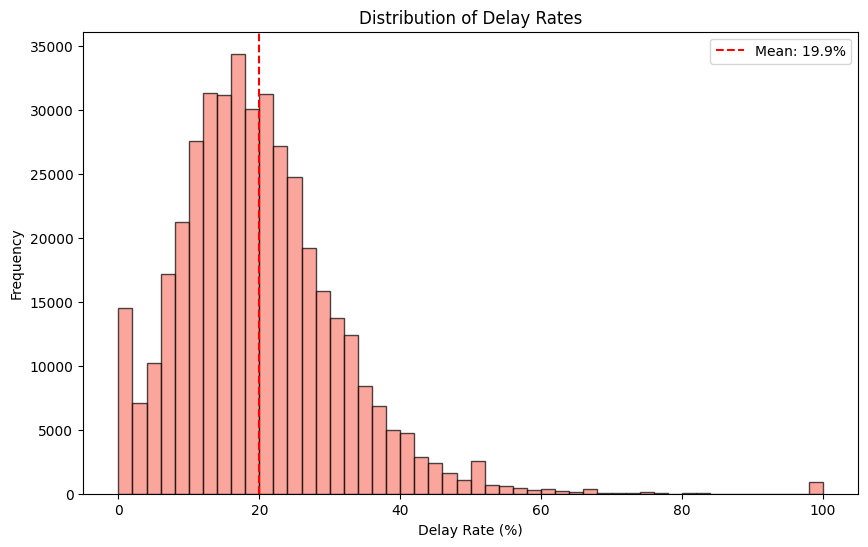

In [16]:
delay_rate = df['delay_rate'].dropna()
mean_delay_rate = delay_rate.mean()

plt.figure(figsize=(10, 6))
plt.hist(delay_rate, bins=50, alpha=0.7, color='salmon', edgecolor='black')
plt.axvline(mean_delay_rate, color='red', linestyle='--',
            label=f'Mean: {mean_delay_rate:.1f}%')
plt.title('Distribution of Delay Rates')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

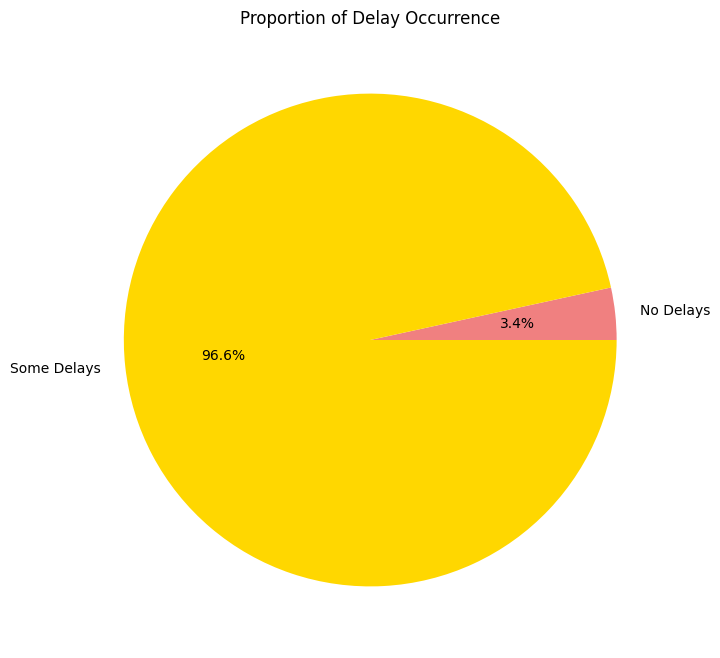

In [17]:
delay_counts = df['has_delays'].value_counts().sort_index()
labels = ['No Delays', 'Some Delays']

plt.figure(figsize=(8, 8))
plt.pie(delay_counts.values, labels=labels, autopct='%1.1f%%',
        colors=['lightcoral', 'gold'])
plt.title('Proportion of Delay Occurrence')
plt.show()


### Overal Stats:

In [18]:
print(f"Average arrival delay: {mean_arr_delay:.2f} minutes")
print(f"Median arrival delay: {arr_delay.median():.2f} minutes")
print(f"Standard deviation: {arr_delay.std():.2f} minutes")
print(f"Average delay rate: {mean_delay_rate:.2f}%")
print(f"Records with delays: {delay_counts.get(1, 0):,} "
      f"({df['has_delays'].mean() * 100:.1f}%)")
print(f"Total flights analyzed: {df['arr_flights'].sum():,.0f}")
print(f"Most delayed month: {monthly_delay.idxmax()} "
      f"(avg: {monthly_delay.max():.1f} min)")
print(f"Least delayed month: {monthly_delay.idxmin()} "
      f"(avg: {monthly_delay.min():.1f} min)")

Average arrival delay: 4218.98 minutes
Median arrival delay: 1150.00 minutes
Standard deviation: 12976.26 minutes
Average delay rate: 19.92%
Records with delays: 395,607 (96.6%)
Total flights analyzed: 147,695,149
Most delayed month: 7 (avg: 5901.0 min)
Least delayed month: 9 (avg: 2983.3 min)


# Data Preprocessing 


### Handling Missing Values

In [19]:
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values:,}")

Total missing values: 11,152


In [20]:
target_missing = df['arr_delay'].isnull().sum()
print(f"Missing values in target variable (arr_delay): {target_missing:,}")

Missing values in target variable (arr_delay): 660


In [21]:
df_processed = df.copy()

if target_missing > 0:
    print(f"Removing {target_missing:,} rows with missing target values")
    df_processed = df_processed.dropna(subset=['arr_delay'])
    print("Rows with missing target values removed")

Removing 660 rows with missing target values
Rows with missing target values removed


In [22]:
numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'arr_delay' in numeric_features:
    numeric_features.remove('arr_delay') 

print("Filling missing values with median:")
for col in numeric_features:
    missing_pct = df_processed[col].isnull().mean() * 100
    if missing_pct > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"= {col}: Filled {missing_pct:.1f}% missing values with median ({median_val:.2f})")

Filling missing values with median:
= arr_del15: Filled 0.1% missing values with median (21.00)
= delay_rate: Filled 0.1% missing values with median (18.62)


In [23]:
missing_after_cleaning = df_processed.isnull().sum().sum()
print(f"\nTotal missing values after cleaning: {missing_after_cleaning:,}")
print(f"Rows remaining: {len(df_processed):,} ({len(df_processed)/len(df)*100:.1f}% of original)")

df_processed.isnull().sum()


Total missing values after cleaning: 0
Rows remaining: 408,952 (99.8% of original)


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
delay_rate             0
has_delays             0
dtype: int64

### Outlier Detection

In [24]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [25]:
outlier_columns = ['arr_delay', 'arr_flights']
print("Outlier detection results:")

for col in outlier_columns:
    if col in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, col)
        outlier_pct = (len(outliers) / len(df_processed)) * 100
        print(f"- {col}: {len(outliers):,} outliers ({outlier_pct:.1f}%)")

Outlier detection results:
- arr_delay: 46,942 outliers (11.5%)
- arr_flights: 48,191 outliers (11.8%)


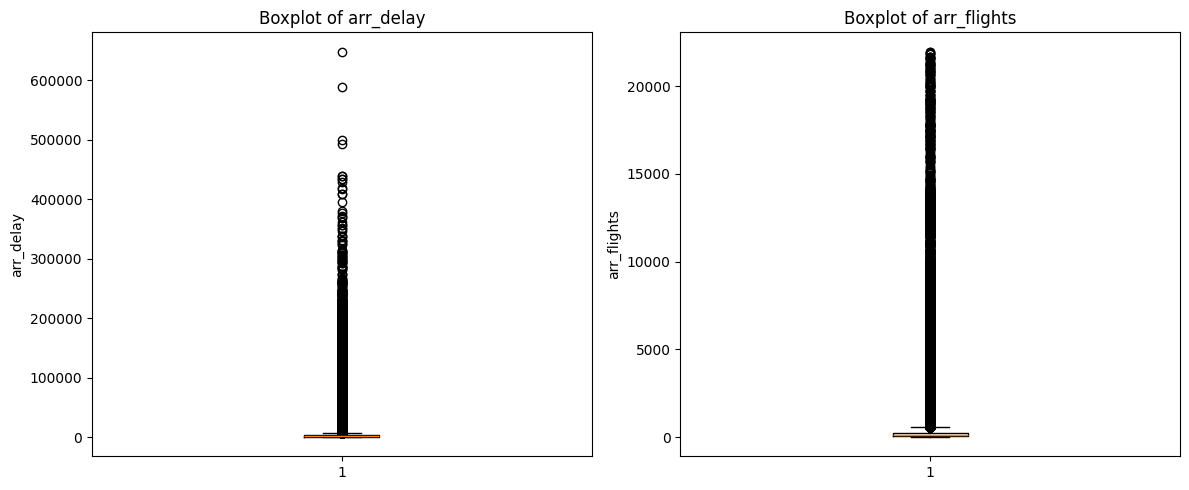

In [26]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(['arr_delay', 'arr_flights']):
    if col in df_processed.columns:
        plt.subplot(1, 2, i+1)
        plt.boxplot(df_processed[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
plt.tight_layout()
plt.show()

### Capping the most extreme outliers

In [27]:
col = 'arr_delay'
if col in df_processed.columns:
    p95 = df_processed[col].quantile(0.95)
    p5 = df_processed[col].quantile(0.05)
    
    extreme_high = (df_processed[col] > p95).sum()
    extreme_low = (df_processed[col] < p5).sum()
    
    if extreme_high > 0 or extreme_low > 0:
        df_processed[col] = df_processed[col].clip(lower=p5, upper=p95)
        print(f"- {col}: Capped {extreme_high + extreme_low} extreme values")
    else:
        print(f"- {col}: No extreme outliers to cap")

- arr_delay: Capped 40843 extreme values


### Creating additianal features

In [28]:
unnecessary_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
existing_unnecessary = [col for col in unnecessary_cols if col in df_processed.columns]
if existing_unnecessary:
    df_processed = df_processed.drop(columns=existing_unnecessary)
    print(f"Removed unnecessary count columns: {existing_unnecessary}")

Removed unnecessary count columns: ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']


In [29]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
existing_delay_cols = [col for col in delay_cols if col in df_processed.columns]
if existing_delay_cols:
    df_processed['total_delay_minutes'] = df_processed[existing_delay_cols].sum(axis=1)
    print(f"Created total_delay_minutes: Sum of all delay types")

Created total_delay_minutes: Sum of all delay types


In [30]:
if 'arr_del15' in df_processed.columns and 'arr_flights' in df_processed.columns:
    df_processed['delay_rate'] = (df_processed['arr_del15'] / df_processed['arr_flights']) * 100
    df_processed['delay_rate'] = df_processed['delay_rate'].fillna(0)
    print(f"Updated delay_rate: Percentage of flights delayed 15+ minutes")

Updated delay_rate: Percentage of flights delayed 15+ minutes


In [31]:
df_processed['season'] = df_processed['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring', 
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
print(f"Created season: Categorical season based on month")

Created season: Categorical season based on month


In [32]:

holiday_months = [6, 7, 11, 12]
df_processed['is_holiday_period'] = df_processed['month'].isin(holiday_months).astype(int)
print(f"Created is_holiday_period: Binary indicator for high-travel months")

Created is_holiday_period: Binary indicator for high-travel months


In [33]:
print(f"Dataset shape after feature engineering: {df_processed.shape}")
print(f"New columns: {df_processed.columns}")

Dataset shape after feature engineering: (408952, 21)
New columns: Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'delay_rate', 'has_delays',
       'total_delay_minutes', 'season', 'is_holiday_period'],
      dtype='object')


### Categorical Encoding: Converting categorical variables to numerical format

In [34]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns found: {categorical_cols}")

Categorical columns found: ['carrier', 'carrier_name', 'airport', 'airport_name', 'season']


In [35]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_processed.copy()

for col in categorical_cols:
    unique_values = df_encoded[col].nunique()
    print(f"- {col}: {unique_values} unique values")
    
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col].astype(str))
    df_encoded.drop(col, axis=1, inplace=True)

print(f"Dataset shape after encoding: {df_encoded.shape}")

- carrier: 38 unique values
- carrier_name: 51 unique values
- airport: 424 unique values
- airport_name: 458 unique values
- season: 4 unique values
Dataset shape after encoding: (408952, 21)


### Data Scaling

In [36]:
print(f"Final dataset shape: {df_encoded.shape}")
print(f"Target variable: arr_delay (average delay in minutes)")

# Quick summary of final dataset after proprocessing
print(f"\nDataset summary:")
print(f"Total records: {len(df_encoded):,}")
print(f"Features: {df_encoded.shape[1]-1}") 
print(f"Target variable range: {df_encoded['arr_delay'].min():.1f} to {df_encoded['arr_delay'].max():.1f} minutes")

Final dataset shape: (408952, 21)
Target variable: arr_delay (average delay in minutes)

Dataset summary:
Total records: 408,952
Features: 20
Target variable range: 37.0 to 16370.4 minutes


# ML Model Training

### Prepare Features and Target Variable

In [37]:
feature_cols = ['year', 'month', 'arr_flights', 'arr_del15', 'carrier_delay', 
                'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
                'total_delay_minutes', 'delay_rate', 'is_holiday_period',
                'carrier_encoded', 'airport_encoded', 'season_encoded']

available_features = [col for col in feature_cols if col in df_encoded.columns]
print(f"Available features for modeling: {len(available_features)}")
print(f"Features: {available_features}")

X = df_encoded[available_features]
y = df_encoded['arr_delay']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Available features for modeling: 15
Features: ['year', 'month', 'arr_flights', 'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay_minutes', 'delay_rate', 'is_holiday_period', 'carrier_encoded', 'airport_encoded', 'season_encoded']
Feature matrix shape: (408952, 15)
Target variable shape: (408952,)


### Train-Test Split


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Testing set size: {X_test.shape[0]:,} samples")
print(f"Training set percentage: {(len(X_train)/len(X))*100:.1f}%")
print(f"Testing set percentage: {(len(X_test)/len(X))*100:.1f}%")


Training set size: 327,161 samples
Testing set size: 81,791 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import time

print("Libraries imported successfully!")

Libraries imported successfully!


### Model Training: Linear Regression

In [40]:
start_time = time.time()

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

training_time_lr = time.time() - start_time

print(f"Linear Regression trained in {training_time_lr:.2f} seconds")
print(f"Linear Regression Results:")
print(f"R² Score: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.2f} minutes")
print(f"MAE: {lr_mae:.2f} minutes")

Linear Regression trained in 0.12 seconds
Linear Regression Results:
R² Score: 0.5400
RMSE: 2769.66 minutes
MAE: 1734.24 minutes


### Model Training: Random Forest Regression

In [41]:
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

training_time_rf = time.time() - start_time

print(f"Random Forest trained in {training_time_rf:.2f} seconds")
print(f"Random Forest Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.2f} minutes")
print(f"MAE: {rf_mae:.2f} minutes")

Random Forest trained in 143.33 seconds
Random Forest Results:
R² Score: 1.0000
RMSE: 2.33 minutes
MAE: 0.05 minutes


#### Model Training: K-Nearest Neighbors

In [42]:
start_time = time.time()

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

training_time_knn = time.time() - start_time

print(f"K-Nearest Neighbors trained in {training_time_knn:.2f} seconds")
print(f"KNN Results:")
print(f"R² Score: {knn_r2:.4f}")
print(f"RMSE: {knn_rmse:.2f} minutes")
print(f"MAE: {knn_mae:.2f} minutes")

K-Nearest Neighbors trained in 43.42 seconds
KNN Results:
R² Score: 0.9850
RMSE: 500.89 minutes
MAE: 313.73 minutes


#### Model Training: Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

start_time = time.time()

dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,  
    min_samples_leaf=10,    
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

training_time_dt = time.time() - start_time

print(f"Decision Tree trained in {training_time_dt:.2f} seconds")
print(f"Decision Tree Results:")
print(f"R² Score: {dt_r2:.4f}")
print(f"RMSE: {dt_rmse:.2f} minutes")
print(f"MAE: {dt_mae:.2f} minutes")

Decision Tree trained in 1.68 seconds
Decision Tree Results:
R² Score: 1.0000
RMSE: 3.89 minutes
MAE: 2.63 minutes
